# Dataset Preparation

In [4]:
import numpy as np
import os
from os import listdir
from pathlib import Path
import keras.utils as image
import glob

dataset preparation

In [5]:
folder_dir=r"C:\Users\91893\machine learning\Image Classification\images"
p=Path(folder_dir)
dirs=p.glob("*")
labels_dict={"cat":0,"horse":1,"human":2}
 
image_data=[]
labels=[]
for folder_name in dirs:
    label=str(folder_name).split("\\")[-1][:-1]
    
    for img_path in folder_name.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(20,20))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    
    for img_path in folder_name.glob("*.png"):
        img=image.load_img(img_path,target_size=(20,20))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [6]:
#convert data 
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)

In [7]:
#shuffling data
import random
combine=list(zip(image_data,labels))
random.shuffle(combine)
image_data[:],labels[:]=zip(*combine)

In [81]:
#Visualise the data
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

# SVM CLASSIFIER

In [82]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    
    def hingeLoss(self,W,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            t=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-t))
        return loss[0][0]
    
    def fit(self,X,Y,maxItr=1000,batch_size=100,learning_rate=0.00001):
        n=X.shape[1]
        m=X.shape[0]
        #initialise the model parameters
        c=self.C
        w=np.zeros((1,n))
        b=0
        print(self.hingeLoss(w,b,X,Y))
        
        #Training starts from here
        #weight and bias update rule
        losses=[]
        
        for i in range(maxItr):
            l=self.hingeLoss(w,b,X,Y)
            losses.append(l)
            ids=np.arange(m)
            np.random.shuffle(ids)
            #batch gradient with random shuffling
            
            for batch in range(0,m,batch_size):
                #assume gradient 0 in start
                gradw=0
                gradb=0
                for j in range(batch,batch+batch_size):
                    if j<m:
                        i=ids[j]
                        t=Y[i]*(np.dot(w,X[i].T)+b)
                        
                        if t>1:
                            gradw+=0 
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                #Gradient update is ready
                w = w - learning_rate * w + learning_rate*gradw
                b = b + learning_rate * gradb
        self.W=w
        self.b=b
        return w,b,losses              
                    

WE NEED TO CONVERT DATA FOR ONE TO ONE CLASSIFICATION

In [83]:
M=image_data.shape[0]
image_data=image_data.reshape(M,-1)

In [84]:
classes=len(np.unique(labels))
def classWiseData(x,y):
    data={}
    for i in range(classes):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [85]:
data=classWiseData(image_data,labels)

In [86]:
print(data[1].shape)

(500, 1200)


In [87]:
def getDataPairForSVM(d1,d2):
    #combines data of 2 classes into single matrix
    
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    data_labels[:l1]=-1
    data_labels[l1:]=1
    
    return data_pair,data_labels 

In [88]:
mySVM=SVM()

In [89]:
import matplotlib.pyplot as plt

In [90]:
def trainSVM(x,y):
    svm_classifier={}
    for i in range(classes):
        svm_classifier[i]={}
        for j in range(i+1,classes):
            xpair,ypair=getDataPairForSVM(data[i],data[j])
            wts,bias,loss=mySVM.fit(xpair,ypair)
            svm_classifier[i][j]=(wts,bias)
            
            plt.plot(loss)
            plt.show()
    return svm_classifier

1000.0


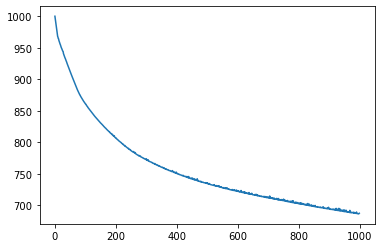

1027.0


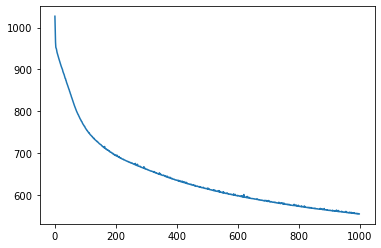

1027.0


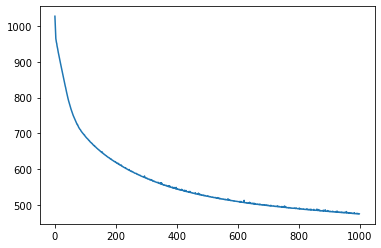

In [91]:
classifiers=trainSVM(image_data,labels)

In [95]:
first=classifiers[0][1]
print(first[0].shape)

(1, 1200)


PREDICTION

In [96]:
def binaryPredict(x,w,b):
    z=np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [100]:
def predict(x):
    count=np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1,classes):
            w,b=classifiers[i][j]
            #Taking a majority prediction
            z=binaryPredict(x,w,b)
            if(z==1):
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    return final_prediction

In [98]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction=predict(x[i])
        if(prediction==y[i]):
            count+=1
    print (count/x.shape[0])

In [103]:
accuracy(image_data,labels)

0.6260641781270465


In [104]:
#WE TRIED TO IMPROVE ACCURACY BY USING LESSER LEARNING RATE AND INCREASING ITERATIONS

USING SKLEARN

In [105]:
from sklearn import svm

In [106]:
svm_classifier=svm.SVC(kernel='linear',C=1.0)
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.702030124426981